In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Naive Bayes

In [2]:
data = pd.read_csv('titanic.csv')
# removing name column
data = data.drop(['name'], axis = 1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,0,1,female,2.00,1,2,151.5500,S
3,0,1,male,30.00,1,2,151.5500,S
4,0,1,female,25.00,1,2,151.5500,S


In [3]:
# split data
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'])

## Data preprocessing
NB can handle discrete features data which can be useful with categorical data.

Let's see one of the advantages of NB classifier. NB is not affected by data scaling

In [4]:
# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
scaled_x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

/home/ayhem18/Ayhem18/DEV/Data_science/Towards_Data_Science/ds_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/ayhem18/Ayhem18/DEV/Data_science/Towards_Data_Science/ds_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Train and test two NB models ono the data before scaling and one after scaling
and observe if the accuracy change with scaling

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Write code here
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('Accuracy before scaling:', accuracy_score(y_test, y_pred))

# Write code here
nb = GaussianNB()
nb.fit(scaled_x_train, y_train)
y_pred = nb.predict(scaled_x_test)
print('Accuracy after scaling:', accuracy_score(y_test, y_pred))

Accuracy before scaling: 0.7862595419847328
Accuracy after scaling: 0.7862595419847328


# Regularization
What is [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)?
How can you specify the contribution of each part using l1 ration

Apply classification on the breast cancer dataset with no regularization, l1,
l2, and elastic-net.

### Loading Breast cancer dataset

In [6]:
X, y = load_breast_cancer(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Fitting both Lasso and Ridge

Fit 3 models: Lasso and Ridge and Elastic-Net.
Then print their accuracy and coefficients and notice the difference.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score

# Write code here
lasso = Lasso()
ridge = RidgeClassifier()
elasticnet = ElasticNet()

def model(model, model_name, print_zero=False):
    global x_train, x_test, y_train, y_test
    # the model is assumed to be linear in the function
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    if len(np.unique(y_pred)) > 2:
        y_pred = y_pred > 0.5
    score = accuracy_score(y_test, y_pred)   
    
    coefs = model.coef_ 
    print(f"{model_name}'s coefficients: ")
    for c in coefs:
        if c.all() != 0 :
            print(f"\t{c}")
        elif c.all() == 0 and print_zero:
            print(f"\t{c}")
            
    print(f"{model_name}'s accuracy: {score}")
    print()
    
models = [lasso, ridge, elasticnet]
names = ["Lasso", "Ridge", "ElasticNet"]

for m, n in zip(models, names):
    model(m, n, print_zero=True)

Lasso's coefficients: 
	-0.0
	-0.0
	-0.0
	-0.00023817212611857441
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-5.5678468059991235e-05
	-0.0004842808015410192
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
Lasso's accuracy: 0.8421052631578947

Ridge's coefficients: 
	[ 0.34894376  0.00306089 -0.01026111 -0.00256649 -0.23636864 -0.03366272
 -0.2625773  -0.44952068 -0.30465557 -0.01585031 -0.2550041   0.05442145
 -0.08093722  0.00277543 -0.09661121  0.1150606   0.31887857 -0.07943448
 -0.04408642  0.01113721 -0.53484972 -0.02928854  0.01885468  0.00250438
 -0.55373343 -0.22838262 -0.42514715 -0.90252352 -0.62371346 -0.12162393]
Ridge's accuracy: 0.9707602339181286

ElasticNet's coefficients: 
	-0.0
	-0.0
	-0.0
	0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0008601143429825037
	-0.010642182151360069
	-1.1048645494854392e-05
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
	-0.0
ElasticNet's acc

We can see that that the classifiers can be order by their accuracy:
1. Ridge
2. Elastic Net
3. Lasso
This can be understood through the coefficient associated with each of these models.
* 'L1' regularization sets the features seen as non-relevant (or of little relevance) to zero. However, Even though some features individually are not as relevant, when combined can improve performance as they tackle mainly the differences between similar classes
* 'L2' generally does not set features to zero, but to extremely small values. This is reflected with the highest accuray as it is not evident that most of features are completely irrelevant or redundant.
* Elastic net is in between having both forms of regularization: the feature deemed as irrelevant are set to $0$. However those who are not are assigned larger coefficients. This combinations is further reflected in an accuracy between both Ridge and Lasso.

# KNN
Compare KNN vs logistic regression

---
In ML images can be flattened to 1D vector of pixels, then we can train our
models on them considering each pixel as a feature.

Dataset shape (1797, 8, 8)


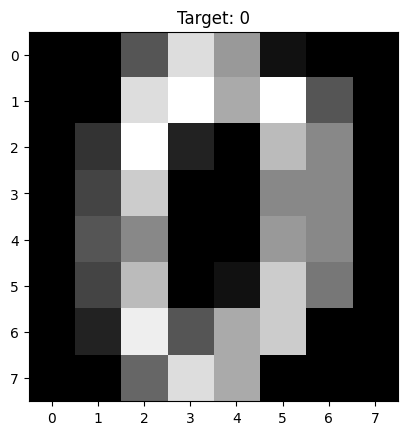

Now we have 1797 images flattened to 64-values vectors


In [8]:
# Based on https://github.com/hsu-ai-course/hsu.ai/blob/master/code/12.%20kNN%20and%20ANN%20for%20MNIST.ipynb
digits = load_digits()

print("Dataset shape", digits.images.shape)

# show first image
plt.title(f"Target: {digits.target[0]}")
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
print("Now we have {} images flattened to {}-values vectors".format(*X.shape))

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train a KNN and LR models and compare their results

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

CV = StratifiedKFold(n_splits=4, shuffle=True, random_state=11)

# Write code here
knn = KNeighborsClassifier()

# let's find the best the hyperparameters for knn
knn_params = {"n_neighbors": range(10, 20), "weights": ['uniform', 'distance']}
knn_searcher = GridSearchCV(knn, knn_params, scoring='accuracy', cv=CV)
knn_searcher.fit(X_train, y_train)
knn = knn_searcher.best_estimator_


In [11]:

# let's find the best hyperparameters for LR
LR = LogisticRegression(max_iter=5000, solver='liblinear')
LR_params = {"C": [10 ** i for i in range(-2, 4)]}
LR_searcher = GridSearchCV(LR, LR_params, scoring='accuracy', cv=CV)
LR_searcher.fit(X_train, y_train)
LR = LR_searcher.best_estimator_

y_true, y_pred = y_test, knn.predict(X_test)
print('KNN', classification_report(y_true, y_pred))

y_true, y_pred = y_test, LR.predict(X_test)
print('LR', classification_report(y_true, y_pred))

KeyboardInterrupt: 

Which model performed better? What is the advantages of each model over the other?

What is the output of `classification_report` function? How to interpret it?

KNN performed better than Linear Regression with a slight margin. This is refleccted in all different performance metrics. KNN has the ability to  capture non-linear relations that Logistic Regression cannot. The problem is fairly linear since LR manages to predict all classes with high accuracy.

The output of the classification report can be interpreted as follows: For each class :
* recall represents the number of example correctly classified as the $i$-th class out of the all examples classified as the $i$-th class.
* precision represents the number of example correctly classified as the $i$-th class out of the all examples that belong to the $i$-th class: precision serves as the accuracy of that class.


references:
* https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec
* https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=Understanding%20the%20Classification%20report%20through%20sklearn%20A%20Classification,predictions%20are%20True%20and%20how%20many%20are%20False.